# CIFAR-10 Classification

## Import Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Keras + Tensorflow
import warnings
warnings.filterwarnings('ignore')
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten, Dropout, MaxPool2D, BatchNormalization, Activation
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


## Load Data

In [2]:
# Load Dataset for Train and Test
#       WARNING: THIS WILL DOWNLOAD DATASET
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [3]:
print("Train Dataset: ",X_train.shape)
print("Test Dataset: ",X_test.shape)

Train Dataset:  (50000, 32, 32, 3)
Test Dataset:  (10000, 32, 32, 3)


## Dataset Visualization

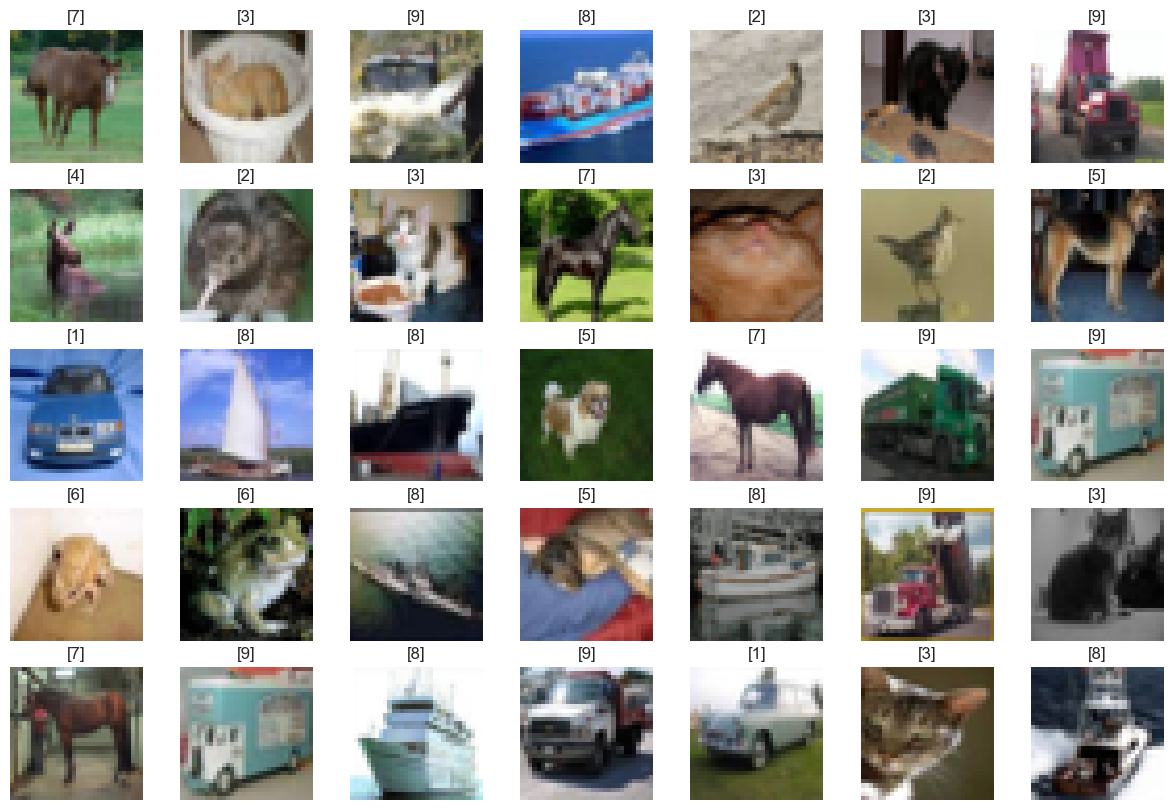

In [4]:
# Create Grid with Images from Train Split
width_grid = 7
height_grid = 5

fig, axes = plt.subplots(height_grid, width_grid, figsize = (15,10))
axes = axes.ravel()

for i in np.arange(0, height_grid * width_grid):
    index_img = np.random.randint(0, len(X_train))
    axes[i].imshow(X_train[index_img])
    axes[i].set_title(Y_train[index_img])
    axes[i].grid(False)
    axes[i].axis('off')

# - Class 0: Airplane
# - Class 1: Car
# - Class 2: Bird
# - Class 3: Cat
# - Class 4: Deer
# - Class 5: Dog
# - Class 6: Frog
# - Class 7: Horse
# - Class 8: Ship
# - Class 9: Truck


## Data Preparation

In [5]:
# Convert to float32 and make in the range [0, 1]
# 255.0 because 8-bit image
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.00

# Convert numeric [0, 9] to arrays
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

# Input shape for model
inputShape = X_train.shape[1:]

## Train Model

In [6]:
# Build Sequential Network
cnn_model = Sequential() # Keras sequential object
cnn_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D((2, 2)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D((2, 2)))
cnn_model.add(Dropout(0.3))
cnn_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D((2, 2)))
cnn_model.add(Dropout(0.4))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)


# Compile Model
cnn_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

cnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)      

In [7]:
# Training on Real Data
history_epochs = cnn_model.fit(x=X_train, y=Y_train, batch_size=64, epochs=100, shuffle=True, verbose=1, validation_split=0.2)


Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 164s 4ms/step - loss: 2.1348 - accuracy: 0.3056 - val_loss: 1.5655 - val_accuracy: 0.4296
Epoch 2/100
40000/40000 [==============================] - 163s 4ms/step - loss: 1.5660 - accuracy: 0.4300 - val_loss: 1.3647 - val_accuracy: 0.4994
Epoch 3/100
40000/40000 [==============================] - 162s 4ms/step - loss: 1.4369 - accuracy: 0.4734 - val_loss: 1.4226 - val_accuracy: 0.4785
Epoch 4/100
40000/40000 [==============================] - 162s 4ms/step - loss: 1.3610 - accuracy: 0.5052 - val_loss: 1.2538 - val_accuracy: 0.5466
Epoch 5/100
40000/40000 [==============================] - 167s 4ms/step - loss: 1.2938 - accuracy: 0.5313 - val_loss: 1.2965 - val_accuracy: 0.5270
Epoch 6/100
40000/40000 [==============================] - 166s 4ms/step - loss: 1.2368 - accuracy: 0.5554 - val_loss: 1.1149 - val_accuracy: 0.5995
Epoch 7/100
40000/40000 [==============================

## Evalute Model

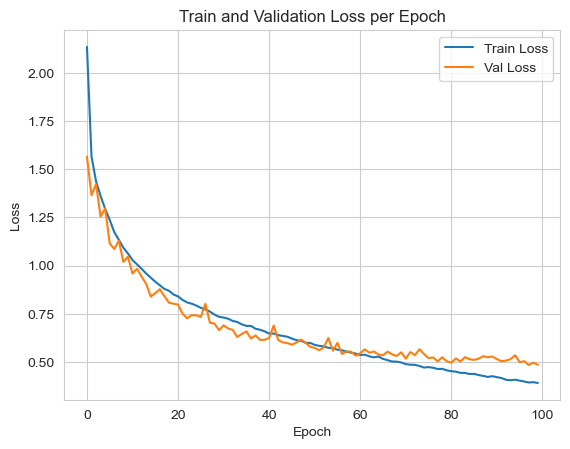

50000/50000 [==============================] - 41s 811us/step
Model Evaluation (Higher is Better): 
--- Train Accuracy: 0.916
--- Test Accuracy: 0.831


In [8]:
# Plot Training Results
plt.figure()
plt.plot(history_epochs.history['loss'])
plt.plot(history_epochs.history['val_loss'])
plt.legend(['Train Loss','Val Loss'])
plt.title('Train and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

evaluation_test = cnn_model.evaluate(X_test, Y_test)
evaluation_train = cnn_model.evaluate(X_train, Y_train)
print('Model Evaluation (Higher is Better): \n--- Train Accuracy: %.3f\n--- Test Accuracy: %.3f' % (evaluation_train[1], evaluation_test[1]))

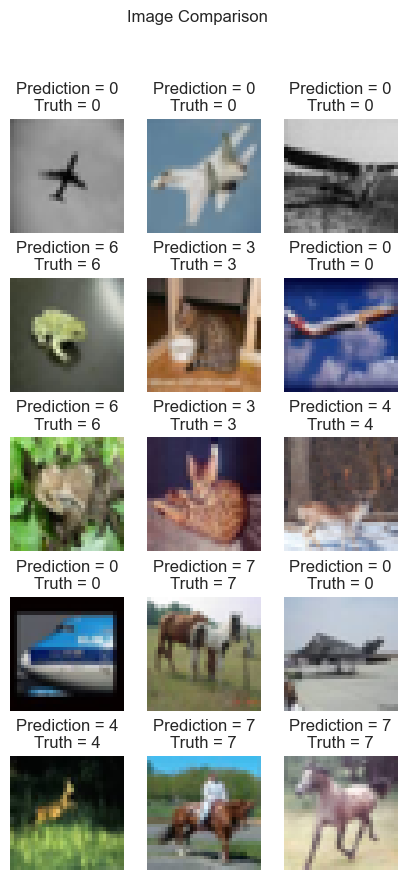

In [9]:
# Create Grid with Images from Train Split
predicted_classes = cnn_model.predict_classes(X_test)
original_class = Y_test.argmax(1)
width_grid = 3
height_grid = 5

fig, axes = plt.subplots(height_grid, width_grid,figsize = (5,10))
axes = axes.ravel()
fig.suptitle('Image Comparison')
for i in np.arange(0, height_grid * width_grid):
    index_img = np.random.randint(0, len(X_test))
    axes[i].imshow(X_test[index_img])
    axes[i].set_title('Prediction = {}\nTruth = {}'.format(predicted_classes[index_img],original_class[index_img]))
    axes[i].grid(False)
    axes[i].axis('off')

plt.show()
# - Class 0: Airplane
# - Class 1: Car
# - Class 2: Bird
# - Class 3: Cat
# - Class 4: Deer
# - Class 5: Dog
# - Class 6: Frog
# - Class 7: Horse
# - Class 8: Ship
# - Class 9: Truck

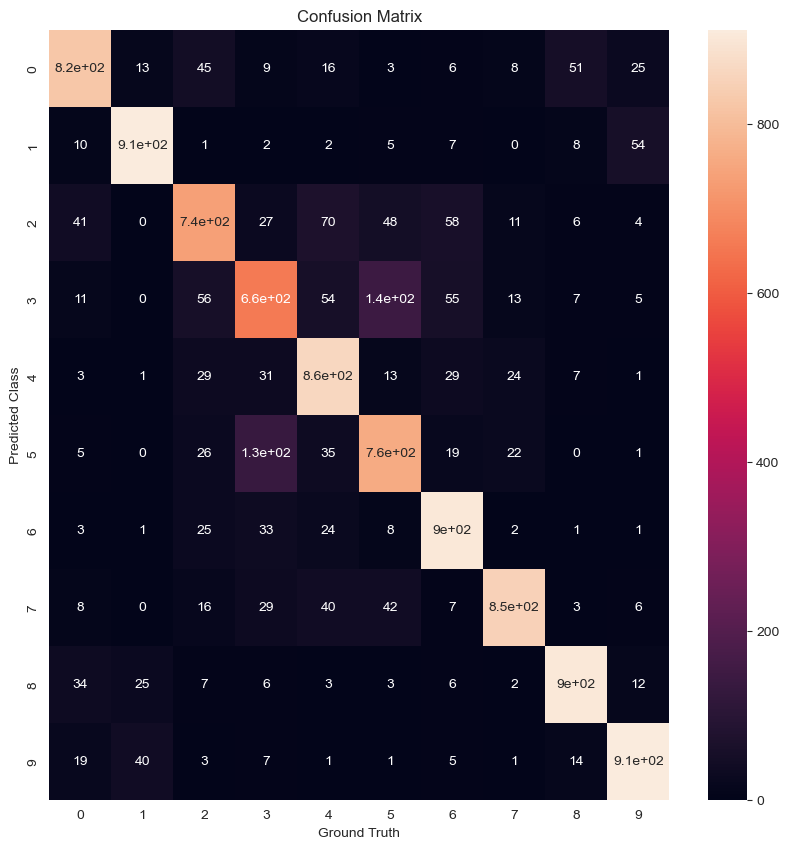

In [10]:
# Plot Confusion Matrix

cm = confusion_matrix(original_class, predicted_classes)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Ground Truth')
plt.ylabel('Predicted Class')
plt.show()

## Save Trained Model .h5 file

In [11]:
model_dir = os.path.join(os.getcwd(),'saved_model')

# Make directory if doesn't exist
if not os.path.isdir(model_dir):
    os.makedirs(model_dir)

# Declare model path
model_path = os.path.join(model_dir, 'keras_cifar10_trained_model.h5')

# Save .h5 model
cnn_model.save(model_path)